# Kaplan Meier Estimator (Non-parametic)

- kaplan meier estimator는 적은 표본에서도 적용할 수 있기 때문에 폭넓게 사용되며, 특정 가정이 필요없다는 장점이 존재한다...
- 관측된 생존시간의 생존확률을 계산하여 right censored data를 처리한다...

---
작동되는 방법:
1. 확률의 곱 규칙을 사용한다.
   $$S(t_i) = S(t_{i-1}) \left(1 - \frac{d_i}{n_i} \right)$$
2. di는 시간 ti에서 발생한 이벤트의 수
3. ni는 ti까지 생존자의 수

> 즉, 시간 ti에서의 생존율은 이전 시간에서의 생존확률과 t_i에서의 생존확률의 곱과 같다

## 분석

In [2]:
import pandas as pd

data = pd.read_csv("Kaplan-Meier_Example_Dataset.csv")
data.head()

,time,event,group,gender
0,4.7,1,ESRD,female
1,30.1,1,cardiac,male
2,13.2,1,respiratory,female
3,9.1,1,respiratory,male
4,1.7,0,ESRD,female


In [6]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['event'] = encoder.fit_transform(data['event'])

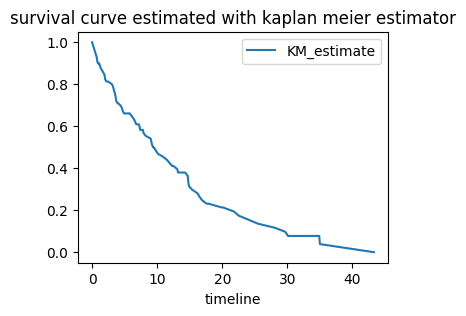

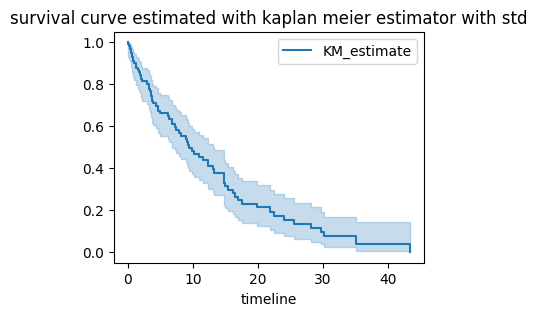

In [13]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
kmf.fit(durations = data['time'], event_observed = data['event'])

# std 없이 출력 
kmf.survival_function_.plot(figsize = (4, 3))
plt.title('survival curve estimated with kaplan meier estimator')
plt.show()

kmf.plot_survival_function(figsize = (4, 3))
plt.title('survival curve estimated with kaplan meier estimator with std')
plt.show()

### group을 나누어서 분석 수행

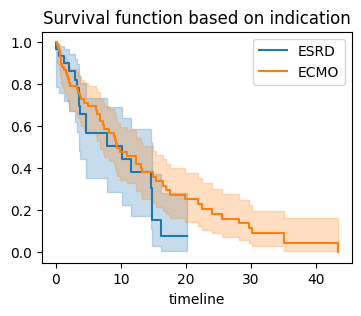

In [27]:
# True 와 false 형태로 나타남
group_ESRD = (data['group'] == 'ESRD')
group_ECMO = ((data['group'] == 'cardiac') | (data['group'] == 'respiratory'))

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations = data[group_ESRD]['time'], 
        event_observed = data[group_ESRD]['event'],
        label = 'ESRD')
kmf.plot_survival_function(figsize = (4, 3), ax = ax)

kmf.fit(durations = data[group_ECMO]['time'],
        event_observed = data[group_ECMO]['event'],
        label = 'ECMO')
kmf.plot_survival_function(figsize = (4, 3), ax = ax)
plt.title("Survival function based on indication")
plt.show()


### Gender로 나누어서 분석 수행

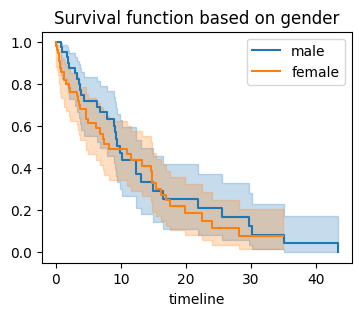

In [26]:
# Gender
gender_male = data['gender']=='male'
gender_female = data['gender']=='female'

ax = plt.subplot()
kmf = KaplanMeierFitter()

kmf.fit(durations = data[gender_male]['time'], 
        event_observed = data[gender_male]['event'],
        label = 'male')
kmf.plot_survival_function(figsize = (4, 3), ax = ax)

kmf.fit(durations = data[gender_female]['time'], 
        event_observed = data[gender_female]['event'],
        label = 'female')
kmf.plot_survival_function(figsize = (4, 3), ax = ax)
plt.title("Survival function based on gender")
plt.show()